In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0, asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=0, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, IP,downstream_YAG, crystal1,crystal2,crystal3,crystal4, slit,crl1,crl2]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 360.00034418370416 microns
FWHM in y: 360.00034418370416 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414876966694455
5.414876966694455
b 1.00
b 1.64
b 0.61
b 1.00
0.6102211874545929
19.86913187055027
19.869131870550262
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69
after c2: 0.00
after c3: 0.69
after c4: 0.00
(array([-0.23281791,  0.        ,  0.0332055 ]), array([0.023807  , 0.        , 0.99971657]))
1.3620401788281523e-05


In [4]:
print(crystal2.alpha)

0.43404492398595806


In [5]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.2595306524099044
0.03060251960041145
0.3467890417726059


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: -9.15
zx: 134.13
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.21
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: -3.71
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: 12.30
zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
dr

<IPython.core.display.Javascript object>


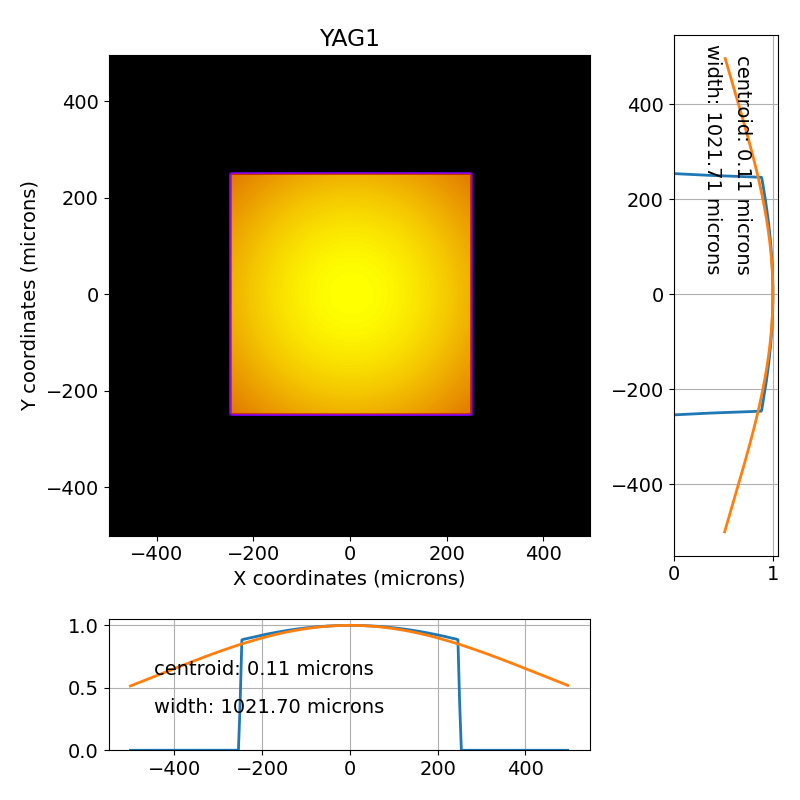

<IPython.core.display.Javascript object>


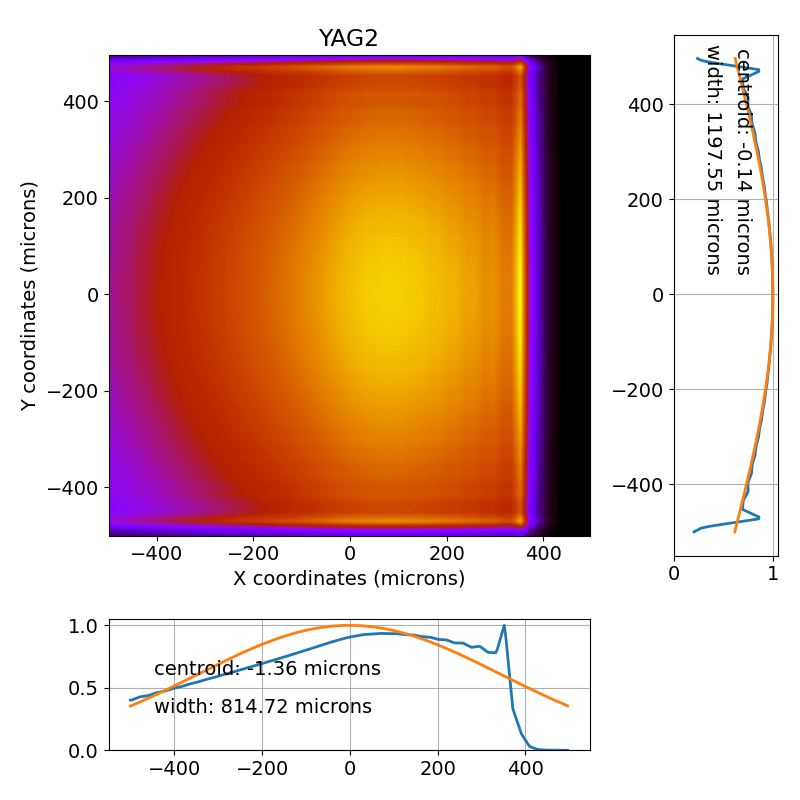

<IPython.core.display.Javascript object>


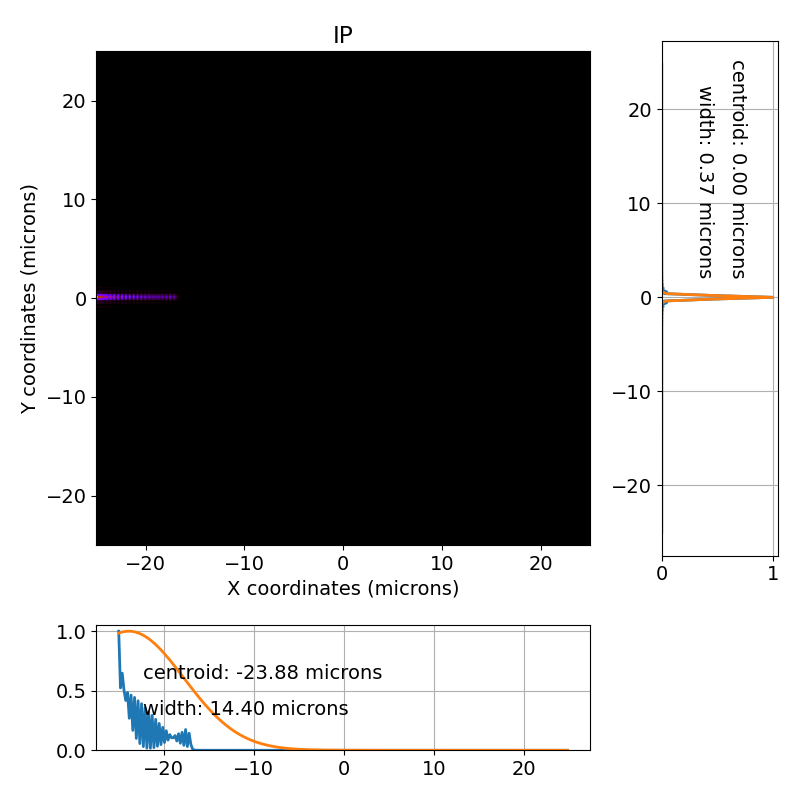

<IPython.core.display.Javascript object>


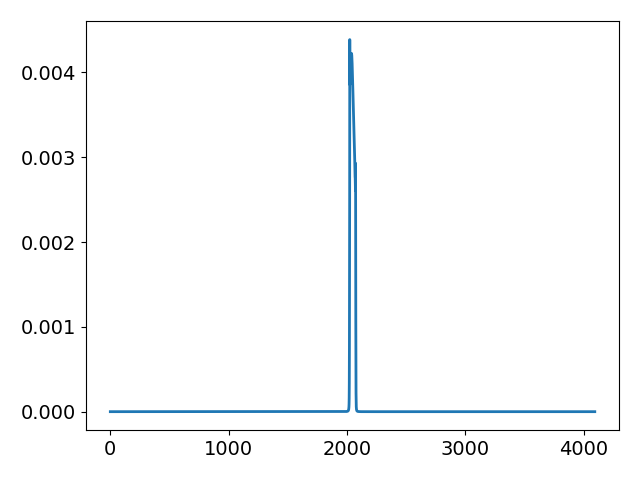

In [6]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [76]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=20, time_window=500, SASE=True, num_spikes=10)
print(pulse_test.N)

562


<IPython.core.display.Javascript object>


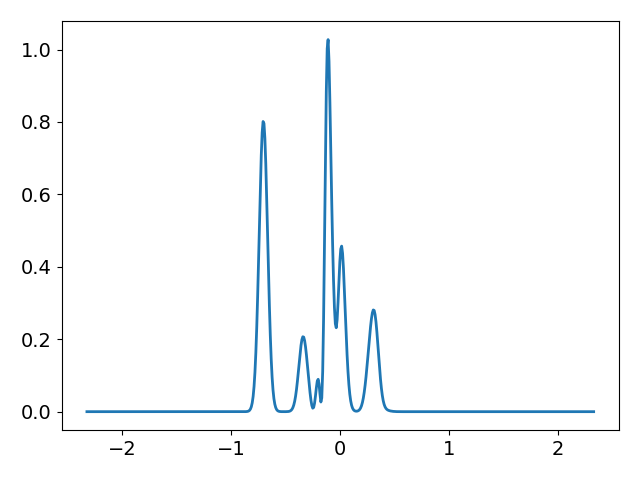

<IPython.core.display.Javascript object>


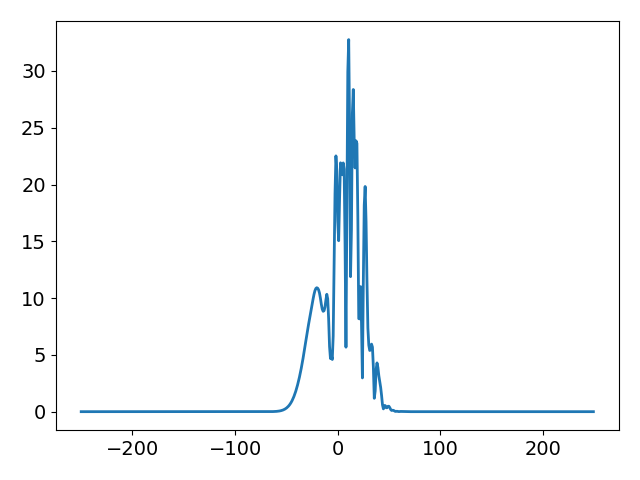

In [77]:
plt.figure()
plt.plot(pulse_test.energy-9500,np.abs(pulse_test.envelope)**2)
plt.figure()
plt.plot(pulse_test.t_axis,np.abs(pulse_test.pulse))

In [78]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG2','IP'])

FWHM in x: 360.05044239255193 microns
FWHM in y: 360.05044239255193 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414121703468495
5.414121703468495
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.00
zy: 360.02
azimuth -0.05 mrad
drift6
delta z: -6.45
zx: 134.10
zy: 360.12
azimuth -0.05 mrad
c3
zx: 360.10
zy: 360.12
azimuth 693.64 mrad
drift7
delta z: -2.61
zx: 360.11
zy: 360.13
azimuth 693.64 mrad
c4
zx: 360.11
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: 8.67
z

/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2922: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2923: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2930: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2936: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2958: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/Matt/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2972: RuntimeWarning: 

FWHM in x: 360.05012894214804 microns
FWHM in y: 360.05012894214804 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4141264282823265
5.4141264282823265
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.00
zy: 360.02
azimuth -0.05 mrad
drift6
delta z: 0.08
zx: 134.10
zy: 360.12
azimuth -0.05 mrad
c3
zx: 360.10
zy: 360.12
azimuth 693.64 mrad
drift7
delta z: 0.03
zx: 360.11
zy: 360.13
azimuth 693.64 mrad
c4
zx: 360.11
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: -0.10


zx: 360.12
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: -0.10
zx: 360.15
zy: 360.16
azimuth -0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.05 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.05 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.05 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
FWHM in x: 360.0479348046577 microns
FWHM in y: 360.0479348046577 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414159501979155
5.414159501979155
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad

zx: 134.00
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.10
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.11
zy: 360.12
azimuth 693.64 mrad
drift7
delta z: 0.03
zx: 360.12
zy: 360.13
azimuth 693.64 mrad
c4
zx: 360.12
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: -0.10
zx: 360.15
zy: 360.16
azimuth -0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.05 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.05 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.05 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.05 mrad
F

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.11
zy: 360.12
azimuth 693.64 mrad
drift7
delta z: 0.03
zx: 360.13
zy: 360.13
azimuth 693.64 mrad
c4
zx: 360.13
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: -0.10
zx: 360.15
zy: 360.16
azimuth -0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.0

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.12
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.13
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.13
zy: 360.13
azimuth -0.06 mrad
drift8
delta z: -0.10
zx: 360.16
zy: 360.16
azimuth -0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
drift11
delta z

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.12
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.14
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.14
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.16
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.13
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.14
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.14
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.17
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.13
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.15
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.15
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx: 360.17
zy: 360.16
azimuth -0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.04 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.04 mr

FWHM in x: 360.03351685453083 microns
FWHM in y: 360.03351685453083 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414376843415453
5.414376843415453
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.04 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.04 mrad
c3
zx: 360.14
zy: 360.12
azimuth 693.63 mrad
drift7
delta z: 0.03
zx: 360.15
zy: 360.13
azimuth 693.63 mrad
c4
zx: 360.15
zy: 360.13
azimuth -0.05 mrad
drift8
delta z: -0.10
zx

zx: 3.05
zy: 3.05
azimuth -0.04 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
FWHM in x: 360.03132292023815 microns
FWHM in y: 360.03132292023815 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414409917112281
5.414409917112281
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.01
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.11
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.14
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.16
zy: 360.13
azimuth 6

zx: -0.88
zy: -0.88
azimuth -0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.04 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.04 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.04 mrad
FWHM in x: 360.0291290127808 microns
FWHM in y: 360.0291290127808 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4144429908091105
5.4144429908091105
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
az

zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.15
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.17
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.17
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.19
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
F

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.15
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.17
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.17
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.20
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data 

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.16
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.17
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.17
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.20
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.16
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.18
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.18
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.20
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta

zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.17
zy: 360.12
azimuth 693.62 mrad
drift7
delta z: 0.03
zx: 360.18
zy: 360.13
azimuth 693.62 mrad
c4
zx: 360.18
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 360.21
zy: 360.16
azimuth -0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta

FWHM in x: 360.0181598780072 microns
FWHM in y: 360.0181598780072 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41460835929325
5.41460835929325
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.03 mrad
drift6
delta z: 0.08
zx: 134.12
zy: 360.12
azimuth -0.03 mrad
c3
zx: 360.17
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.19
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.19
zy: 360.13
azimuth -0.04 mrad
drift8
delta z: -0.10
zx: 36

zx: 134.12
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.18
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.19
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.19
zy: 360.13
azimuth -0.03 mrad
drift8
delta z: -0.10
zx: 360.22
zy: 360.16
azimuth -0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
FWHM in x: 360.01596613155175 microns
FWHM in y: 360.01596613155175 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414641432990077
5.414641432990077
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
FWHM in x: 360.0153393517784 microns
FWHM in y: 360.0153393517784 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414650882617744
5.414650882617744
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.02
zy: 360.02
azimuth -0.02 mrad

zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.18
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.20
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.20
zy: 360.13
azimuth -0.03 mrad
drift8
delta z: -0.10
zx: 360.22
zy: 360.16
azimuth -0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.03 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.03 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.03 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.03 mrad
FWHM in x: 360.0131456398209 microns
FWHM in y: 360.0131456398209 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414683956314572
5.414683956314572
mr1l0
zx: 110.00


zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.19
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.20
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.20
zy: 360.13
azimuth -0.03 mrad
drift8
delta z: -0.10
zx: 360.23
zy: 360.16
azimuth -0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05

focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.0090716745129 microns
FWHM in y: 360.0090716745129 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414745378894396
5.414745378894396
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359

zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.20
zy: 360.12
azimuth 693.61 mrad
drift7
delta z: 0.03
zx: 360.21
zy: 360.13
azimuth 693.61 mrad
c4
zx: 360.21
zy: 360.13
azimuth -0.03 mrad
drift8
delta z: -0.10
zx: 360.24
zy: 360.16
azimuth -0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.0068780392149 microns
FWHM in y: 360.0068780392149 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414778452591224
5.414778452591224
mr1l0
zx: 110.00


zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.20
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.22
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.22
zy: 360.13
azimuth -0.03 mrad
drift8
delta z: -0.10
zx: 360.24
zy: 360.16
azimuth -0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.00468443074664 microns
FWHM in y: 360.00468443074664 microns
F

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.02 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.02 mrad
c3
zx: 360.21
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.22
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.22
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.10
zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.02 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.02 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 360.00249084910786 mic

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.13
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.21
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.10
zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
drift9

zx: 3.05
zy: 3.05
azimuth -0.02 mrad
FWHM in x: 359.9984171258139 microns
FWHM in y: 359.9984171258139 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414906022564703
5.414906022564703
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth 

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.03
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.10
zx: 360.26
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9962236208278 microns
FWHM in y: 359.9962236208278 microns
FWH

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99434349504924 microns
FWHM in y: 359.99434349504924 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414967445144526
5.414967445144526
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9924633889803 microns
FWHM in y: 359.9924633889803 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414995794027521
5.414995794027521
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.59

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.03
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.10
zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9905833026208 micr

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.24
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.03
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.10
zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9

zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.10
zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.987136528817 microns
FWHM in y: 359.987136528817 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415076115862675
5.415076115862675
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.08
zx: 134.14
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.03
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.10
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.98494316179534 microns
FWHM in y: 359.98494316179534 microns
F

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.03
zx: 360.27
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.27
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.10
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9

zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.9808698370658 microns
FWHM in y: 359.9808698370658 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415170612139328
5.415170612139328
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth -0.00 mrad

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.10
zx: 360.30
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.10
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.9767966048521 microns
FWHM in y: 359.9767966048521 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4152320

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.10
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
d

zx: 360.32
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9727234651505 microns
FWHM in y: 359.9727234651505 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415293457298975
5.415293457298975
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.

zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9708435857206 microns
FWHM in y: 359.9708435857206 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415321806181971
5.415321806181971
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.29
zy: 360.13
azimuth 693.58 

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.15
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.03
zx: 360.30
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.10
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.96865041795826 microns
FWHM in y: 359.96865041795826 microns
FWHM Divergence (

FWHM in x: 359.9667705812239 microns
FWHM in y: 359.9667705812239 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415383228761795
5.415383228761795
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.30
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.10
zx: 360

focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.96457746327224 microns
FWHM in y: 359.96457746327224 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415416302458622
5.415416302458622
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360

zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.34
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9623843721408 microns
FWHM in y: 359.9623843721408 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4154493761554505
5.4154493761554505
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29


FWHM in x: 359.960504601089 microns
FWHM in y: 359.960504601089 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415477725038446
5.415477725038446
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.3

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.0

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.03
zx: 360.33
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9564318314055 microns
FWHM in y: 359.9564318314055 microns
FWHM Divergence (x)

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.16
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.33
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.10
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.10
zx: 360.36
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9520458751894 microns
FWHM in y: 359.9520458751894 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415605295011925
5.415605295011925
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
az

FWHM in x: 359.95016621250625 microns
FWHM in y: 359.95016621250625 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415633643894921
5.415633643894921
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.10
zx: 3

FWHM in x: 359.9479732976109 microns
FWHM in y: 359.9479732976109 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4156667175917494
5.4156667175917494
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.10
zx: 3

zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9457804095323 microns
FWHM in y: 359.9457804095323 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415699791288576
5.415699791288576
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.35
zy: 360.13
azimuth 693.56 

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.03
zx: 360.36
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.10
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
z

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.08
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.10
zx: 360.39
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94108145394796 microns
FWHM in y: 359.94108145394796 microns
FWHM Divergence (

zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.10
zx: 360.39
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.93888865014696 microns
FWHM in y: 359.93888865014696 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415803737192895
5.415803737192895
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29


zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9366958731606 microns
FWHM in y: 359.9366958731606 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415836810889723
5.415836810889723
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.0

zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.10
zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.93450312298836 microns
FWHM in y: 359.93450312298836 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4158698845865505
5.4158698845865505
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 3

zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.93231039962984 microns
FWHM in y: 359.93231039962984 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415902958283379
5.415902958283379
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.38
zy: 360.13
azimuth 693.5

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.03
zx: 360.39
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.10
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.38
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.39
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.10
zx: 360.42
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.0

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.38
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.40
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.40
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.42
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.92541915791685 microns
FWHM in y: 

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.08
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.39
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.40
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.40
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.43
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9232265456381 microns
FWHM in y: 359.9232265456381 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416039977884523
5.416

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.39
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.41
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.41
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.43
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta

zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9191546225373 microns
FWHM in y: 359.9191546225373 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416101400464346
5.416101400464346
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.40
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.41
zy: 360.13
azimuth 693.54 

zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.40
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.03
zx: 360.42
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.42
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.44
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.9172753046015 microns
FWHM in y: 359.9172753046015 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416129749347342
5.416129749347342
mr1l0
zx: 110.00
zy: 110.00
azimu

zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.40
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.42
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.42
zy: 360.13
azimuth 0.04 mrad
drift8
delta z: -0.10
zx: 360.45
zy: 360.16
azimuth 0.04 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.91

zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.41
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.42
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.42
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.45
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.91320351664507 microns
FWHM in y: 359.91320351664507 microns
FW

zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.41
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.43
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.43
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.46
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.9113242610819 microns
FWHM in y: 359.9113242610819 microns
FWHM

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.09
zy: 360.02
azimuth 0.04 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.04 mrad
c3
zx: 360.42
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.43
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.43
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.46
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained Na

zx: 134.09
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.19
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.42
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.44
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.44
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.47
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.04 mrad
FWHM in x: 359.90

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.43
zy: 360.12
azimuth 693.53 mrad
drift7
delta z: 0.03
zx: 360.44
zy: 360.13
azimuth 693.53 mrad
c4
zx: 360.44
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.47
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
drift1

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.43
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.45
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.45
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.47
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.04 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.04 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.04 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.04 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second m

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.43
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.45
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.45
zy: 360.13
azimuth 0.05 mrad
drift8
delta z: -0.10
zx: 360.48
zy: 360.16
azimuth 0.05 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.44
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.45
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.45
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.48
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained Na

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.44
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.46
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.46
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.49
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
YAG2
zx: 3.0

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.45
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.46
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.46
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.49
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width

zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.45
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.47
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.47
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.49
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
FWHM in x: 359.89

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.10
zy: 360.02
azimuth 0.05 mrad
drift6
delta z: 0.08
zx: 134.20
zy: 360.12
azimuth 0.05 mrad
c3
zx: 360.46
zy: 360.12
azimuth 693.52 mrad
drift7
delta z: 0.03
zx: 360.47
zy: 360.13
azimuth 693.52 mrad
c4
zx: 360.47
zy: 360.13
azimuth 0.06 mrad
drift8
delta z: -0.10
zx: 360.50
zy: 360.16
azimuth 0.06 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.05 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.05 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.05 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
YAG2
zx: 3.0

x becomes unfocused
y stays unfocused
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
FWHM in x: 359.8906537497556 microns
FWHM in y: 359.8906537497556 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416531358523113
5.416531358523113
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.46
zy: 360.12
azimuth 693.51 mrad
drift7
delta z: 0.03

zx: 0.00
zy: 0.00
azimuth 0.05 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.05 mrad
drift12
delta z: 0.00
x becomes unfocused
y remains focused
x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.05 mrad
FWHM in x: 359.8887747305242 microns
FWHM in y: 359.8887747305242 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416559707406108
5.416559707406108
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00

zx: 360.51
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
drift12
delta z: 0.00
x becomes unfocused
y remains focused
x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.886895730985 microns
FWHM in y: 359.886895730985 microns
FWHM Divergence (x): 3.3 μrad
FWHM 

zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
drift12
delta z: 0.00
x becomes unfocused
y remains focused
x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.8850167511378 microns
FWHM in y: 359.8850167511378 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416616405172098
5.416616405172098
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.

zx: 360.49
zy: 360.13
azimuth 0.07 mrad
drift8
delta z: -0.10
zx: 360.52
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
drift12
delta z: 0.00
x becomes unfocused
y remains focused
x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.8831377909821 microns
FWHM in 

zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.8812588505181 microns
FWHM in y: 359.8812588505181 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4166731029380895
5.4166731029380895
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.48
zy: 360.12
azimuth 693.51 mrad
drift7
delta z: 0.03
zx: 360.50
zy: 360.13
azimuth 693.51 mrad
c4
zx: 360.50
zy: 360.13
azimuth 0

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.49
zy: 360.12
azimuth 693.51 mrad
drift7
delta z: 0.03
zx: 360.50
zy: 360.13
azimuth 693.51 mrad
c4
zx: 360.50
zy: 360.13
azimuth 0.07 mrad
drift8
delta z: -0.10
zx: 360.53
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.11
zy: 360.02
azimuth 0.06 mrad
drift6
delta z: 0.08
zx: 134.21
zy: 360.12
azimuth 0.06 mrad
c3
zx: 360.49
zy: 360.12
azimuth 693.50 mrad
drift7
delta z: 0.03
zx: 360.51
zy: 360.13
azimuth 693.50 mrad
c4
zx: 360.51
zy: 360.13
azimuth 0.07 mrad
drift8
delta z: -0.10
zx: 360.53
zy: 360.16
azimuth 0.07 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.06 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.06 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.06 mrad
drift11
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y becomes focused
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
IP
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.06 mra

Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.00
zy: 0.00
azimuth 0.06 mrad
drift12
delta z: 0.00
x becomes unfocused
y remains focused
x stays unfocused
y becomes unfocused
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.06 mrad
FWHM in x: 359.8753090022862 microns
FWHM in y: 359.8753090022862 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.416762874400909
5.416762874400909
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mr

In [25]:
90+(248-205)

133

<IPython.core.display.Javascript object>


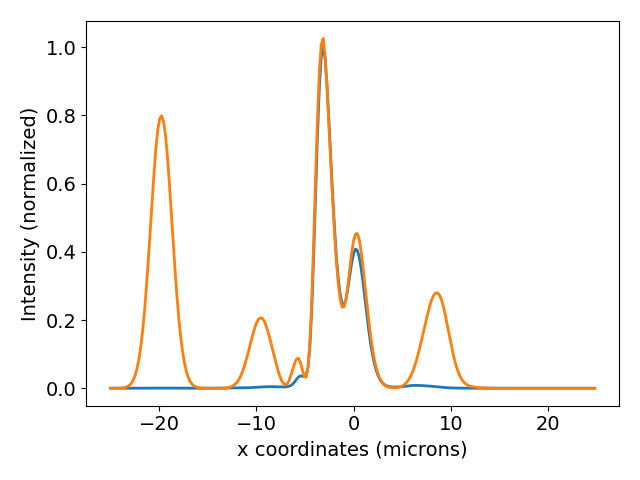

In [83]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'

conversion = 28.

x = pulse_test.x['IP']*1e6
spectrum_interp = np.interp(x,(pulse_test.energy-pulse_test.E0)*conversion, np.abs(pulse_test.envelope)**2)

ax, lineout = pulse_test.plot_1d_projection('IP')
lineout /= np.max(lineout)
mask = lineout>.01*np.max(lineout)

rocking_curve = lineout[mask]/spectrum_interp[mask]
rocking_curve /= np.max(rocking_curve)

ax.plot(x, spectrum_interp)
plt.savefig(figure_path+'SASE2.png')
# ax.plot(x[mask], rocking_curve)

# ax.plot((pulse_test.energy-pulse_test.E0)*conversion, np.abs(pulse_test.envelope)**2)

<IPython.core.display.Javascript object>


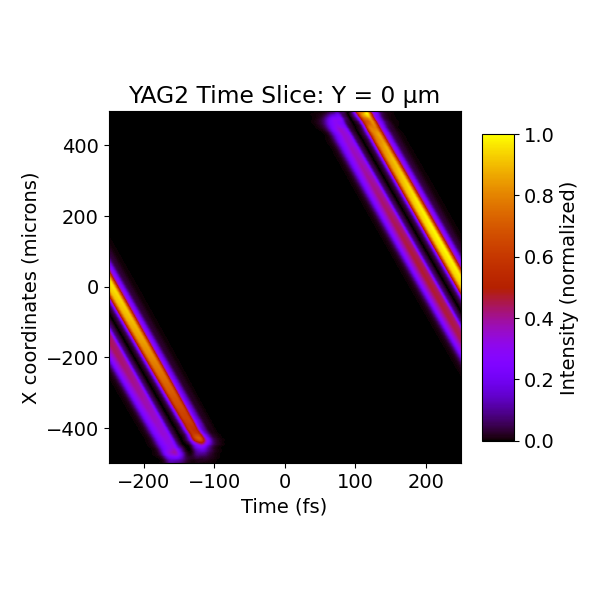

128


<IPython.core.display.Javascript object>


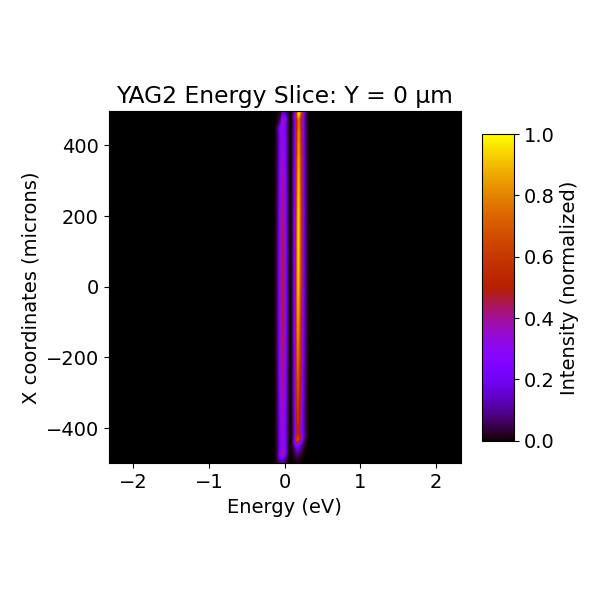

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


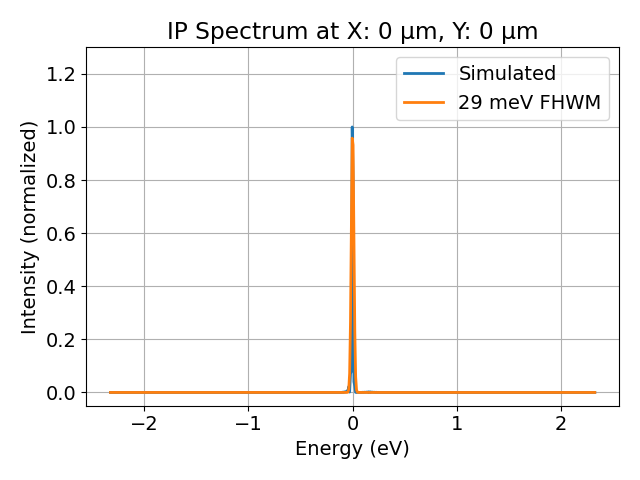

<IPython.core.display.Javascript object>


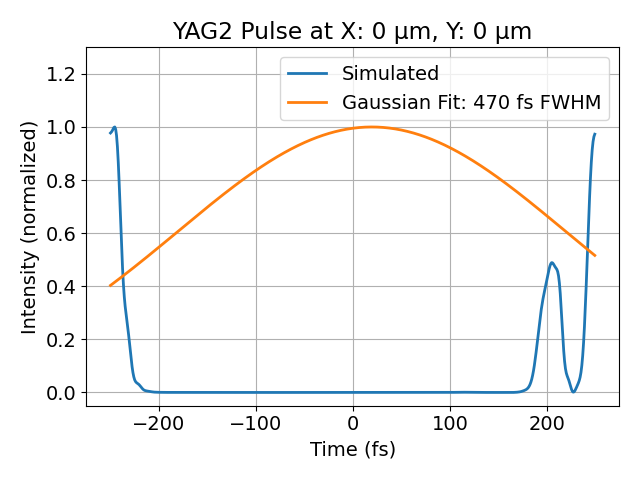

<IPython.core.display.Javascript object>


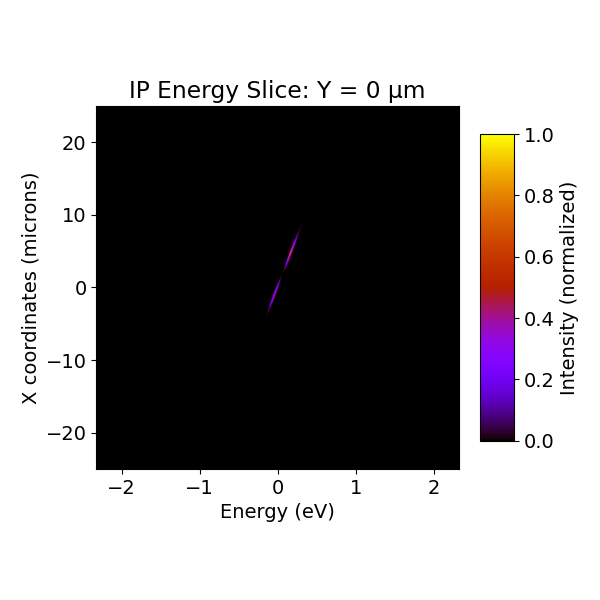

<IPython.core.display.Javascript object>


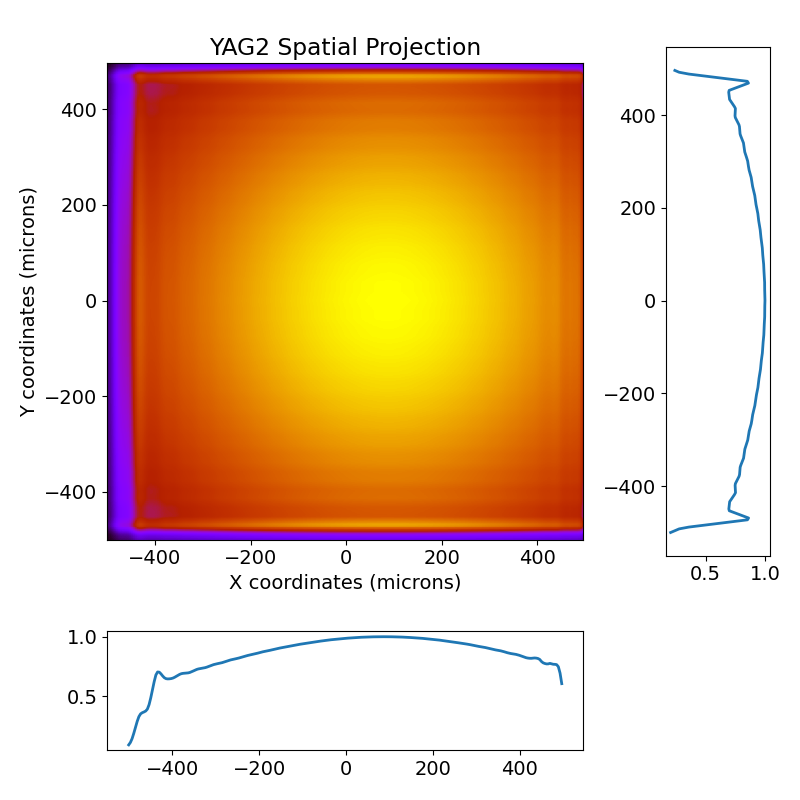

<IPython.core.display.Javascript object>


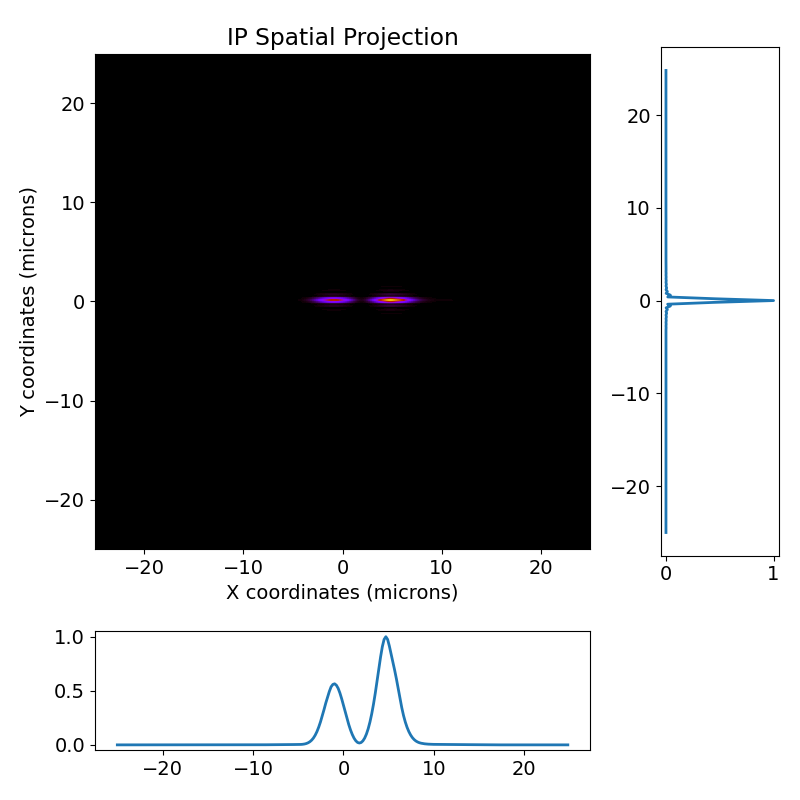

<IPython.core.display.Javascript object>


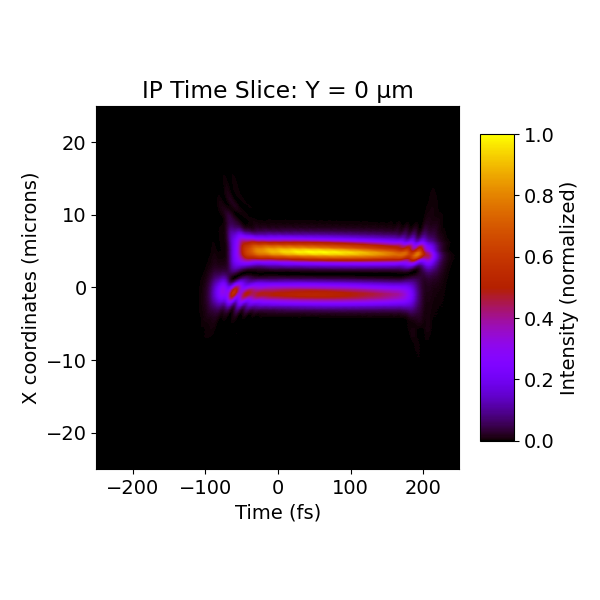

128


In [49]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('IP',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('YAG2')
pulse_test.imshow_projection('IP')
pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


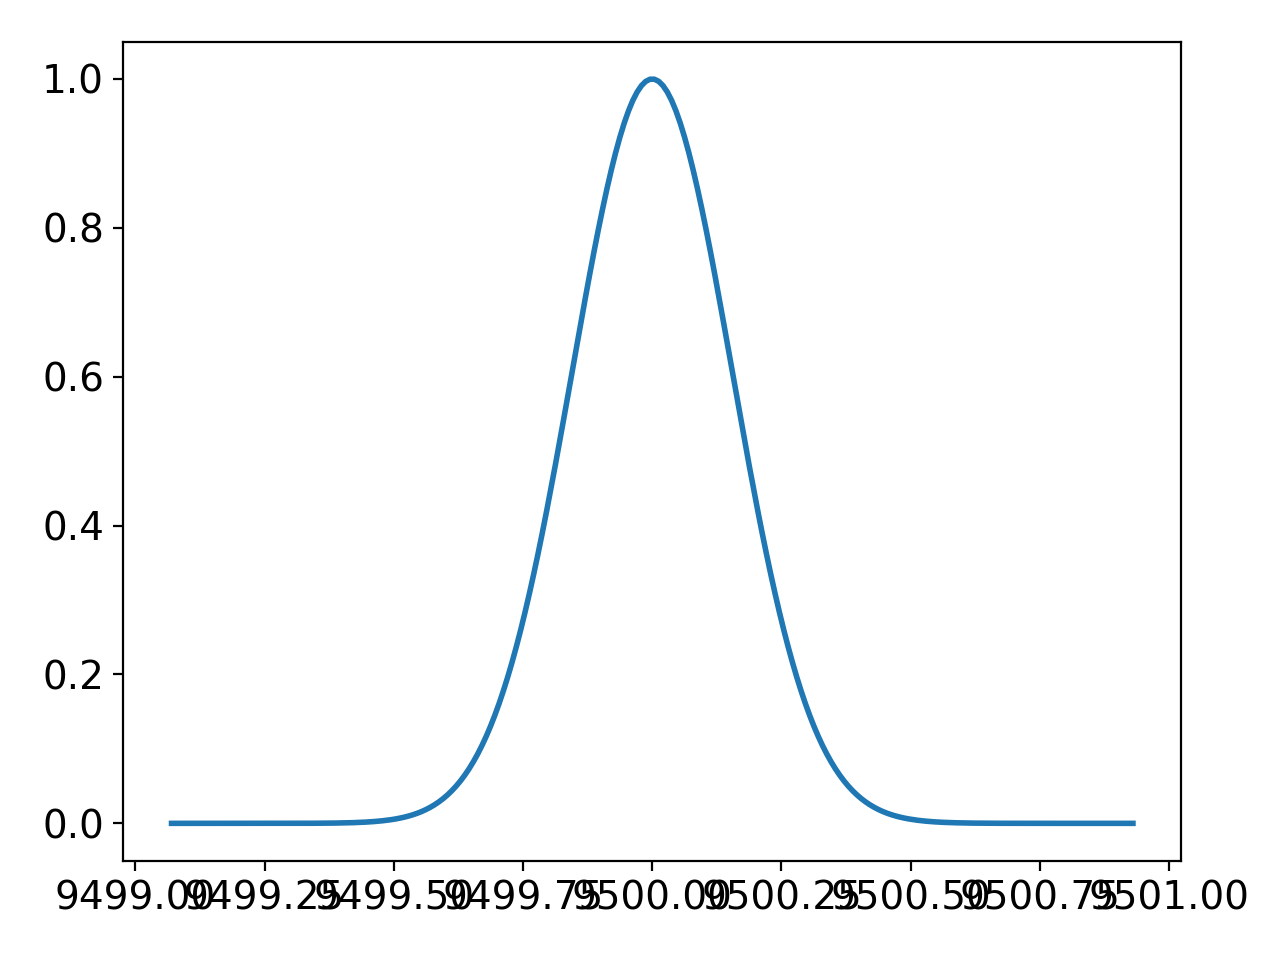

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8